In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [34]:
#remove first 5 responses
df = pd.read_csv('EXERCISE Head Worn Displays Quiz Student Analysis Report.csv')[5:]

In [35]:
#remove bad columns
df = df.drop([x for i, x in enumerate(df.columns) if i % 2 == 1], axis=1)
df = df.drop(['Unnamed: 0', 'Unnamed: 14', 'n correct', 'score'], axis=1)

In [36]:
#find nan, replace with ''
df[df.isna().any(axis=1)]
df.fillna('', inplace=True)

In [37]:
#convert string to int answers
def string_to_int(x):
    if len(x) > 0 and x[0].isnumeric():
        return int(x[0])
    return x
df = df.applymap(string_to_int)

In [38]:
#split columns
eddf = df[df.columns[:6]]
fsdf = df[df.columns[6:]]

# Simple Mean detection, it was a lot better!

In [39]:
print("E Domain (With RA)")
for col in eddf.columns[:-1]:
    print(f"{col.split(':')[-1]} Mean: {eddf[col].mean()}")

print("Free Speech (Without RA)")
for col in fsdf.columns[:-1]:
    print(f"{col.split(':')[-1]} Mean: {fsdf[col].mean()}")

E Domain (With RA)
 The interviewee made sufficient eye contact Mean: 5.545454545454546
 The interviewee gave specific and detailed answers Mean: 6.212121212121212
 The interviewee's answers were relevant and non-contradictory Mean: 5.803030303030303
 The interviewee was engaged in the conversation Mean: 6.03030303030303
 The interviewee had good pacing, with no awkward pauses Mean: 5.7727272727272725
Free Speech (Without RA)
 The interviewee made sufficient eye contact Mean: 4.2727272727272725
 The interviewee gave specific and detailed answers Mean: 4.954545454545454
 The interviewee's answers were relevant and non-contradictory Mean: 4.818181818181818
 The interviewee was engaged in the conversation Mean: 5.484848484848484
 The interviewee had good pacing, with no awkward pauses Mean: 4.257575757575758


# More complex Summary Statistics

In [40]:
df.columns

Index(['8574369: Eminent Domain Video: The interviewee made sufficient eye contact',
       '8574371: Eminent Domain Video: The interviewee gave specific and detailed answers',
       '8574373: Eminent Domain Video: The interviewee's answers were relevant and non-contradictory',
       '8574375: Eminent Domain Video: The interviewee was engaged in the conversation',
       '8574381: Eminent Domain Video: The interviewee had good pacing, with no awkward pauses',
       '8574383: Eminent Domain Video: Did you notice anything out of place, odd, or distracting in the session?',
       '8574705: Free Speech Video: The interviewee made sufficient eye contact',
       '8574707: Free Speech Video: The interviewee gave specific and detailed answers',
       '8574713: Free Speech Video: The interviewee's answers were relevant and non-contradictory',
       '8574715: Free Speech Video: The interviewee was engaged in the conversation',
       '8574717: Free Speech Video: The interviewee had good p

In [41]:
for i, col in enumerate(df.columns[:5]):
    print(df[[col, df.columns[i+6]]].describe())
    print('\n\n\n\n')

       8574369: Eminent Domain Video: The interviewee made sufficient eye contact  \
count                                          66.000000                            
mean                                            5.545455                            
std                                             1.069606                            
min                                             3.000000                            
25%                                             5.000000                            
50%                                             6.000000                            
75%                                             6.000000                            
max                                             7.000000                            

       8574705: Free Speech Video: The interviewee made sufficient eye contact  
count                                          66.000000                        
mean                                            4.272727                

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


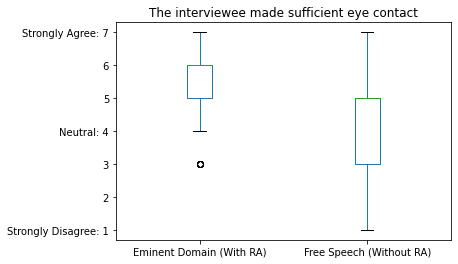

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


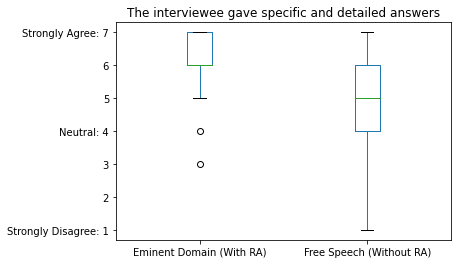

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


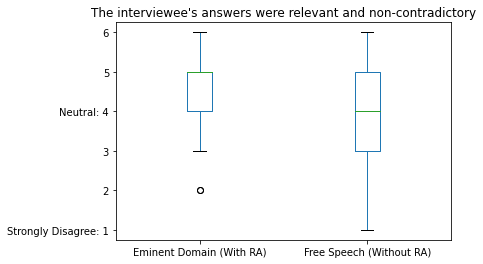

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


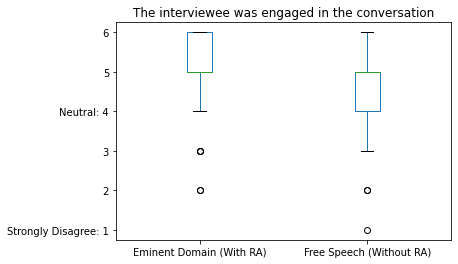

/home/anishthite/miniconda3/envs/simgan-cgp/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


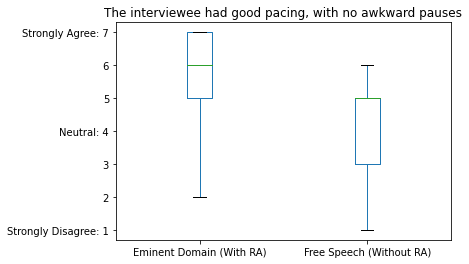

In [49]:
bplots = []
for i, col in enumerate(df.columns[:5]):
    fig, ax = plt.subplots()
    b = df.boxplot([col, df.columns[i+6]])
    ax.set_xticklabels(['Eminent Domain (With RA)','Free Speech (Without RA)'])
    ax.set_yticklabels(['', 'Strongly Disagree: 1', '2', '3', 'Neutral: 4', '5', '6', 'Strongly Agree: 7'])
    plt.title(col.split(': ')[-1])
    ax.grid(False)
    plt.savefig(col.split(': ')[-1] + '.png')
    plt.show()

In [68]:
for i, col in enumerate(df.columns[:5]):
    #print(col)
    s, p = stats.ttest_ind(df[col], df[df.columns[i+6]])
    print(f"Question: {col.split(': ')[-1]} Statistic: {s} P Value: {p})")

Question: The interviewee made sufficient eye contact Statistic: 5.815755226069746 P Value: 4.434216389664779e-08)
Question: The interviewee gave specific and detailed answers Statistic: 7.014394918519988 P Value: 1.13654406852462e-10)
Question: The interviewee's answers were relevant and non-contradictory Statistic: 4.914834540193683 P Value: 2.6263943680774026e-06)
Question: The interviewee was engaged in the conversation Statistic: 3.22889184926616 P Value: 0.0015734824245797203)
Question: The interviewee had good pacing, with no awkward pauses Statistic: 6.540645591568797 P Value: 1.2794038252846018e-09)
